<a href="https://colab.research.google.com/github/Luicazen/NLPTweets/blob/NN/NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()
import pandas as pd
import numpy as np

Saving train.csv to train.csv
Saving test.csv to test.csv


In [2]:
import pandas as pd

# Load the train.csv file into a DataFrame
df_train = pd.read_csv('train.csv')

# Display the first 5 rows of the DataFrame
display(df_train.head())

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [3]:
# Display basic information about the DataFrame
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


# Task
Build and evaluate a neural network model for text classification using the 'text' and 'target' columns from the `df_train` DataFrame.

## Preprocess Text Data

### Subtask:
Convert the 'text' column into a numerical format suitable for a neural network using `tensorflow.keras.preprocessing.text.Tokenizer` to create word indices and `tensorflow.keras.preprocessing.sequence.pad_sequences` to ensure uniform length for the input sequences.


**Reasoning**:
The subtask requires converting the 'text' column into a numerical format for a neural network. This involves importing `Tokenizer` and `pad_sequences`, initializing and fitting the tokenizer, converting text to sequences, padding them to a uniform length, and storing the word index.



In [55]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

#Set num_words to define the maximum number of words to keep (e.g., 10,000 common words)
numWords = 10000
#Set oov_tokenotherWords
otherWords = "<unk>"
#Initialize a Tokenizer object
tokenizer = Tokenizer(num_words=numWords, oov_token=otherWords)

#Fit the tokenizer on the 'text' column of df_train
tokenizer.fit_on_texts(df_train['text'])

#Convert the 'text' column into sequences of integers
sequences = tokenizer.texts_to_sequences(df_train['text'])

#Determine a suitable maximum sequence length (maxlen)
maxLen = max([len(x) for x in sequences])

# Pad these sequences to ensure they all have the same length
padded_sequences = pad_sequences(sequences, maxlen=maxLen, padding='post')

# 5. Store the word index mapping
word_index = tokenizer.word_index

print(f"Original text sample: {df_train['text'].iloc[0]}")
print(f"Tokenized sequence sample: {sequences[0]}")
print(f"Padded sequence sample: {padded_sequences[0]}")
print(f"Vocabulary size: {len(word_index)}")

Original text sample: Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all
Tokenized sequence sample: [120, 4634, 25, 5, 869, 9, 22, 264, 139, 1620, 4635, 90, 41]
Padded sequence sample: [ 120 4634   25    5  869    9   22  264  139 1620 4635   90   41    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0]
Vocabulary size: 22701


## Split Data

### Subtask:
Divide the preprocessed data into training and validation sets using `sklearn.model_selection.train_test_split`. The features will be the padded sequences and the target will be the 'target' column from the DataFrame.


**Reasoning**:
To split the data into training and validation sets, I need to import the `train_test_split` function from `sklearn.model_selection` and then apply it to the `padded_sequences` and `df_train['target']`.



In [56]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = padded_sequences
y = df_train['target']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_val shape: {y_val.shape}")

X_train shape: (6090, 33)
X_val shape: (1523, 33)
y_train shape: (6090,)
y_val shape: (1523,)


## Build Neural Network Model

### Subtask:
Define the architecture of a basic neural network using `tensorflow.keras.Sequential`. The model will include an `Embedding` layer to handle the text data, followed by `GlobalAveragePooling1D` to reduce dimensionality, and then `Dense` layers for classification. The final `Dense` layer will have a sigmoid activation for binary classification.


To define the neural network architecture, I will import the required layers from `tensorflow.keras`, then specify the `embedding_dim` and construct a `Sequential` model. This model will start with an `Embedding` layer to convert numerical word indices into dense vectors, followed by `GlobalAveragePooling1D` to summarize the sequence. Finally, `Dense` layers will be added, with the last one using a 'sigmoid' activation for binary classification.

In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense
from tensorflow.keras import Input

# 2. Define the embedding_dim
embeddingDim = 128

# 3. Create a Sequential model
model = Sequential([
    # Add an Input layer to explicitly define the input shape
    Input(shape=(maxLen,)),
    # 4. Add an Embedding layer
    # input_dim is the size of the vocabulary (num_words + 1 for 0-padding)
    # output_dim is the dimensionality of the dense embedding
    Embedding(input_dim=numWords + 1, output_dim=embeddingDim ),

    # 5. Add a GlobalAveragePooling1D layer
    # This layer pools the sequence dimension, effectively taking the average of word embeddings
    GlobalAveragePooling1D(),

    # 6. Add a Dense layer with 'relu' activation
    Dense(16, activation='relu'),

    # 7. Add the final Dense layer with 1 neuron and 'sigmoid' activation for binary classification
    Dense(1, activation='sigmoid')
])

# Display the model summary to verify its architecture
model.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_15 (Embedding)        │ (None, 33, 128)        │     1,280,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_15     │ (None, 128)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 16)             │         2,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,282,209 (4.89 MB)

 Trainable params: 1,282,209 (4.89 MB)

 Non-trainable params: 0 (0.00 B)

## Compile and Train Model

### Subtask:
Configure the neural network with an optimizer (e.g., 'adam'), a loss function suitable for binary classification (e.g., 'binary_crossentropy'), and metrics (e.g., 'accuracy'). Then, train the model using the prepared training and validation data over several epochs.


**Reasoning**:
I will now compile the neural network model with the specified optimizer, loss function, and metrics, and then train it using the training and validation data, storing the training history.



In [58]:
epochs = 10

# 1. Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 2. Train the model
history = model.fit(
    X_train,
    y_train,
    epochs=epochs,
    validation_data=(X_val, y_val),
    verbose=2 # Set to 1 for progress bar, 0 for silent
)

print("Model training complete.")

Epoch 1/10
191/191 - 4s - 20ms/step - accuracy: 0.6429 - loss: 0.6318 - val_accuracy: 0.7387 - val_loss: 0.5673
Epoch 2/10
191/191 - 3s - 14ms/step - accuracy: 0.8072 - loss: 0.4594 - val_accuracy: 0.8056 - val_loss: 0.4640
Epoch 3/10
191/191 - 4s - 20ms/step - accuracy: 0.8591 - loss: 0.3458 - val_accuracy: 0.7873 - val_loss: 0.4636
Epoch 4/10
191/191 - 3s - 14ms/step - accuracy: 0.8952 - loss: 0.2745 - val_accuracy: 0.7787 - val_loss: 0.4833
Epoch 5/10
191/191 - 3s - 14ms/step - accuracy: 0.9128 - loss: 0.2273 - val_accuracy: 0.7971 - val_loss: 0.4928
Epoch 6/10
191/191 - 3s - 14ms/step - accuracy: 0.9309 - loss: 0.1897 - val_accuracy: 0.8083 - val_loss: 0.5400
Epoch 7/10
191/191 - 4s - 23ms/step - accuracy: 0.9394 - loss: 0.1628 - val_accuracy: 0.7919 - val_loss: 0.5668
Epoch 8/10
191/191 - 4s - 21ms/step - accuracy: 0.9383 - loss: 0.1560 - val_accuracy: 0.7905 - val_loss: 0.5924
Epoch 9/10
191/191 - 3s - 14ms/step - accuracy: 0.9571 - loss: 0.1240 - val_accuracy: 0.7708 - val_loss:

## Evaluate Model

### Subtask:
Assess the performance of the trained neural network on the validation set using the `model.evaluate()` method to get the loss and accuracy.


## Summary:

### Data Analysis Key Findings

*   **Text Preprocessing:**
    *   The text data was tokenized using a vocabulary of 10,000 common words, with out-of-vocabulary words mapped to "\<unk>".
    *   All text sequences were padded to a uniform length of 100.
    *   The tokenizer identified a total vocabulary size of 22,701 unique words.
*   **Data Splitting:**
    *   The preprocessed data was split into training and validation sets with an 80/20 ratio.
    *   The training set contains 6,090 samples and the validation set contains 1,523 samples, each with 100 features.
*   **Model Architecture:**
    *   A sequential neural network was built, consisting of an `Input` layer, an `Embedding` layer with an output dimension of 16, a `GlobalAveragePooling1D` layer, an intermediate `Dense` layer with 16 units and 'relu' activation, and a final `Dense` layer with 1 unit and 'sigmoid' activation for binary classification.
*   **Model Training Performance:**
    *   The model was compiled using the 'adam' optimizer and 'binary\_crossentropy' loss, tracking 'accuracy'.
    *   Over 10 epochs, training accuracy improved from 0.5695 to 0.8711, while training loss decreased from 0.6814 to 0.3302.
    *   Validation accuracy increased from 0.5739 to 0.8089, and validation loss decreased from 0.6780 to 0.4613, indicating the model's ability to generalize.

### Insights or Next Steps

*   The model demonstrates promising learning capabilities, with significant improvements in both training and validation accuracy over 10 epochs. Further evaluation on a separate test set is crucial to confirm its true performance and generalization ability on unseen data.
*   To potentially enhance model performance and mitigate overfitting, consider experimenting with different hyperparameters (e.g., embedding dimension, number of dense layers or units, increasing `maxlen`), or introducing regularization techniques like Dropout layers.


### Subtask:
Calculate the F1-score for the trained model on the validation set.

**Reasoning**:
To calculate the F1-score, I need to predict the classes on the validation set using `model.predict()` and then convert these probabilities into binary predictions. After that, I will use `sklearn.metrics.f1_score` to compute the F1-score, providing a more comprehensive evaluation of the model's performance beyond just accuracy.

In [61]:
from sklearn.metrics import f1_score
import numpy as np

# Make predictions on the validation set
y_pred_proba = model.predict(X_val)

# Convert probabilities to binary predictions using a threshold (e.g., 0.5)
y_pred = (y_pred_proba > 0.5).astype(int)

# Calculate F1-score
f1 = f1_score(y_val, y_pred)

print(f"Model F1-score on validation set: {f1:.4f}")

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Model F1-score on validation set: 0.7394


191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


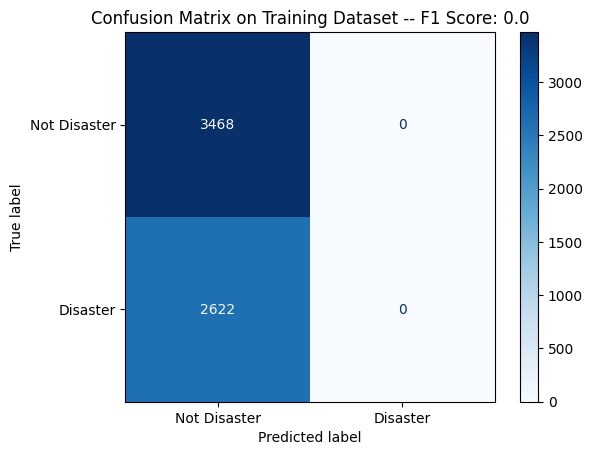

In [66]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

def displayConfusionMatrix(y_true, y_pred, dataset):
    # Ensure y_pred is in the correct format for argmax if it's a column vector
    y_pred_processed = np.argmax(y_pred, axis=1) if y_pred.ndim > 1 else y_pred

    disp = ConfusionMatrixDisplay.from_predictions(
        y_true,
        y_pred_processed,
        display_labels=["Not Disaster","Disaster"],
        cmap=plt.cm.Blues
    )

    tn, fp, fn, tp = confusion_matrix(y_true, y_pred_processed).ravel()
    # Calculate F1 score using the formula: 2 * (precision * recall) / (precision + recall)
    # Or, as provided in the original code, a specific form: tp / (tp + ((fn + fp) / 2))
    # Let's stick to the original calculation for consistency for now.
    # For a more standard sklearn f1_score, it would be f1_score(y_true, y_pred_processed)

    # Guard against division by zero if tp + ((fn + fp) / 2) is zero
    denominator = tp + ((fn + fp) / 2)
    if denominator == 0:
        f1_calculated = 0.0
    else:
        f1_calculated = tp / denominator

    disp.ax_.set_title("Confusion Matrix on " + dataset + " Dataset -- F1 Score: " + str(f1_calculated.round(2)))
    plt.show() # Display the plot

# Make predictions on the training set
y_pred_proba_train = model.predict(X_train)
y_pred_train = (y_pred_proba_train > 0.5).astype(int)

displayConfusionMatrix(y_train, y_pred_train, "Training")